In [47]:
import seismic_dataset_builder  
(X_train, y_train, v_train), (X_test, y_test, v_test), values, labels = seismic_dataset_builder.create_dataset()

X_train = X_train[0] / 255 # Normalise data to [0, 1] range
X_test = X_test[0] / 255 # Normalise data to [0, 1] range


import numpy as np

def fk (data):
	#data = data*np.blackman(len(data[0]))
	#data = data.T
	freq = np.fft.fft2(data)
	freq = np.fft.fftshift(freq)
	freq = freq[int(len(freq)/2):,:]

	#print (np.fft.rfftfreq(freq.shape[0], self.dt_synt))
	#print (np.fft.fftfreq(freq.shape[1], self.dx_synt))

	freq = np.abs(freq)

	freq = 20 * np.log10(freq)
	freq = freq - np.amax(freq)
	freq = np.nan_to_num(freq)
	freq[freq == -np.inf] = 0
	return freq

#def fft1d(matrix):
#    return [np.abs(np.fft.fft(c)) for c in matrix]

#def fft2d(matrix):
#    return np.abs(np.fft.fft2(matrix))

X_train = np.array([image.T[0].T for image in X_train])
X_test = np.array([image.T[0].T for image in X_test]) 

Y_train = np.array([fk (image) for image in X_train])
Y_test = np.array([fk (image) for image in X_test]) 

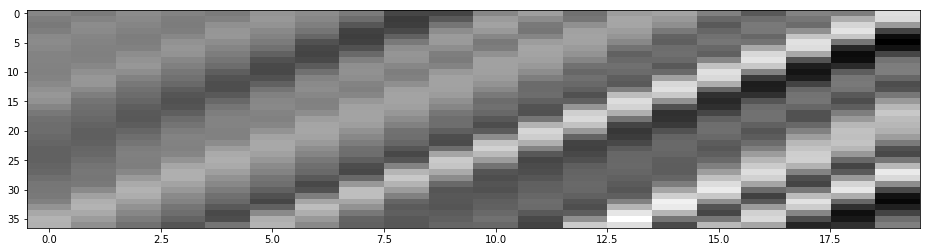

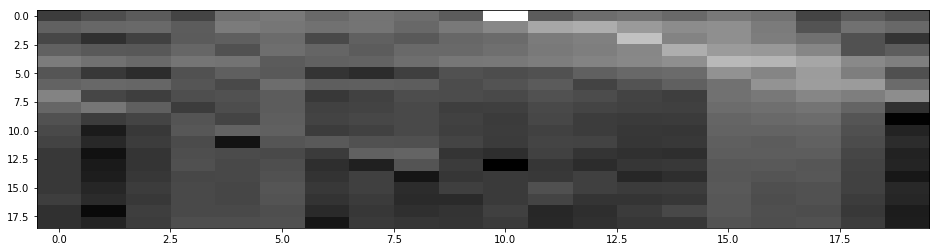

In [48]:
a = X_train[6]
afk = fk (a)
#afk = Y_train[8]

#a = np.fft.rfft2(a).real
#a = np.array(fft1d(a))

#print (a.shape)

import matplotlib.pyplot as plt    
%matplotlib inline

imparams = {
	#'interpolation': 'none',
	'cmap': "gray",
	'aspect': 'auto'
	}
fig = plt.figure(figsize=(16, 4))
plt.imshow(a, **imparams)

fig = plt.figure(figsize=(16, 4))
plt.imshow(afk, **imparams)


In [51]:
def mn (X_train, Y_train, X_test, Y_test):
	from keras.models import Model # basic class for specifying and training a neural network
	from keras.layers import Input, Dense # the two types of neural network layer we will be using
	from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
	import numpy as np

	print ('image has', X_train.shape[1]*X_train.shape[2], 'pixels')
	
	batch_size = 128 # in each iteration, we consider 128 training examples at once
	num_epochs = 10 # we iterate twenty times over the entire training set
	hidden_size = 2048 # there will be 512 neurons in both hidden layers

	num_train = X_train.shape[0] # there are 60000 training examples in MNIST
	num_test = X_test.shape[0] # there are 10000 test examples in MNIST

	in_height = X_test[0].shape[0]
	in_width = X_test[0].shape[1]

	out_height = Y_test[0].shape[0]
	out_width = Y_test[0].shape[1]

	X_train = X_train.reshape(num_train, in_height * in_width) # Flatten data to 1D
	X_test = X_test.reshape(num_test, in_height * in_width) # Flatten data to 1D

	Y_train = Y_train.reshape(num_train, out_height * out_width) # Flatten data to 1D
	Y_test = Y_test.reshape(num_test, out_height * out_width) # Flatten data to 1D

	inp = Input(shape=(in_height * in_width,)) # Our input is a 1D vector of size 784
    
	hidden = Dense(hidden_size)(inp)
	hidden = Dense(hidden_size, activation='relu')(hidden)
	#hidden = Dense(hidden_size)(hidden)
	#hidden = Dense(hidden_size, activation='relu')(hidden)
	#hidden = Dense(hidden_size, activation='relu')(hidden)
    
	out = Dense(out_height * out_width)(hidden) # Output softmax layer

	model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

	model.compile(loss='mean_squared_error', # using the cross-entropy loss function
				  optimizer='adam', # using the Adam optimiser
				  metrics=['accuracy']) # reporting the accuracy

	model.fit(X_train, Y_train, # Train the model using the training set...
			  batch_size=batch_size, nb_epoch=num_epochs,
			  verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
	print(model.evaluate(X_test, Y_test, verbose=1)) # Evaluate the trained model on the test set!
    
	return model

In [52]:
print (len(X_train), len(X_test))

print (X_train.shape)
print (Y_train.shape)

model = mn(X_train, Y_train, X_test, Y_test)

76296 19194
(76296, 37, 20)
(76296, 19, 20)
image has 740 pixels


C:\Users\kostyad\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:38: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
C:\Users\kostyad\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:46: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 68666 samples, validate on 7630 samples
Epoch 1/10
68666/68666 [==============================] - 140s - loss: 103.4801 - acc: 0.9961 - val_loss: 67.9887 - val_acc: 1.0000
Epoch 2/10
68666/68666 [==============================] - 140s - loss: 72.7147 - acc: 1.0000 - val_loss: 98.6954 - val_acc: 1.0000
Epoch 3/10
68666/68666 [==============================] - 140s - loss: 65.5065 - acc: 1.0000 - val_loss: 53.3258 - val_acc: 1.0000
Epoch 4/10
68666/68666 [==============================] - 139s - loss: 59.9449 - acc: 0.9999 - val_loss: 51.7120 - val_acc: 0.9990
Epoch 5/10
68666/68666 [==============================] - 137s - loss: 58.8014 - acc: 0.9996 - val_loss: 49.9457 - val_acc: 0.9997
Epoch 6/10
68666/68666 [==============================] - 134s - loss: 56.0000 - acc: 0.9982 - val_loss: 52.4754 - val_acc: 0.9997
Epoch 7/10
68666/68666 [==============================] - 134s - loss: 55.0760 - acc: 0.9993 - val_loss: 48.7722 - val_acc: 0.9993
Epoch 8/10
68666/68666 [=========

In [53]:
def mn_evaluate_random(model, X_test, Y_test):
	import numpy as np
		
	randidx = np.random.randint(0, len(X_test))
	x = X_test[randidx]
	y = Y_test[randidx]
    
	y_height = y.shape[0]
	y_width = y.shape[1]
	x_height = x.shape[0]
	x_width = x.shape[1]
	print (x_height, x_width, y_height, y_width)    
	
	from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

	import matplotlib.pyplot as plt
	fig = plt.figure(figsize=(16, 4))
    
	ax = fig.add_subplot(131)
	vm = np.percentile(x, 99)
	imparams = {
		#'interpolation': 'none',
		'cmap': "gray",
		'vmin': -vm,
		'vmax': vm,
		'aspect': 'auto'
	}
	plt.imshow(x, **imparams)

	ax = fig.add_subplot(132)
	vm = np.percentile(y, 99)
	imparams = {
		#'interpolation': 'none',
		'cmap': "gray",
		'vmax': vm,
		'aspect': 'auto'
		}
	plt.imshow(y)

	predicted_y = model.predict(x.reshape(1, x_height * x_width))
    
	predicted_y = predicted_y.reshape(y_height, y_width)

	ax = fig.add_subplot(133)
	vm = np.percentile(predicted_y, 80)
	imparams = {
		#'interpolation': 'none',
		'cmap': "gray",
		'vmax': vm,
		'aspect': 'auto'
		}
	plt.imshow(predicted_y)

	return randidx, x, y, predicted_y

37 20 19 20


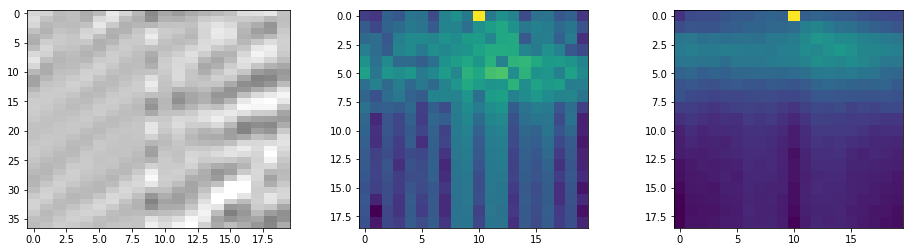

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

randidx, x, y, predicted_y = mn_evaluate_random(model, X_test, Y_test)
#print (y)
#print (predicted_y)